# Utilize RDF to Evaluate Interoperability and Resuability of RDF Data

- This code utilizes the tensile results saved within RDF files. See previous to generate data
- It also allows for analysis of random set of metals and tests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from rdflib import Graph, URIRef, Literal, Namespace, RDF
import random
from IPython.display import display


# Get the directory of the current script or the parent directory
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.path.dirname(os.getcwd())
print(f'Current working directory = {script_dir}')

# Relative path to the results data folder
res_folder_path = os.path.join(script_dir, 'results')
print(f'Results folder path = {res_folder_path}')

def Read_MetalRDF(RDF_fpath):
    
    # Load the RDF graph
    g = Graph()
    g.parse(RDF_fpath, format="xml")

    # Define your namespaces
    PMDco = Namespace("https://w3id.org/pmd/co/")
    RDF = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
    
    test_results = {}

    # Iterate over triples and extract information
    for s, p, o in g:
        if p == PMDco.hasName:
            material = o.toPython()
            test_results[material] = {}
            
        # Iterate over triples and extract information
    for s, p, o in g:
        # Check if the triple corresponds to test results
        if o == PMDco.TestResult:
            test_results[material]['length'] = g.value(subject=o, predicate=PMDco.Length).toPython()
            test_results[material]['width'] = g.value(subject=o, predicate=PMDco.Width).toPython()
            test_results[material]['thickness'] = g.value(subject=o, predicate=PMDco.Thickness).toPython()
            test_results[material]['units'] = g.value(subject=o, predicate=PMDco.Units).toPython()
            test_results[material]['youngs_modulus'] = g.value(subject=o, predicate=PMDco.YoungsModulus).toPython()
            test_results[material]['yield_strength'] = g.value(subject=o, predicate=PMDco.YieldStrength).toPython()
            test_results[material]['proportional_limit'] = g.value(subject=o, predicate=PMDco.ProportionalLimit).toPython()
            test_results[material]['modulus_resilience'] = g.value(subject=o, predicate=PMDco.ModulusOfResilience).toPython()
            test_results[material]['strain_energy_density'] = g.value(subject=o, predicate=PMDco.StrainEnergyDensity).toPython()
            test_results[material]['modulus_toughness'] = g.value(subject=o, predicate=PMDco.ModulusOfToughness).toPython()
            test_results[material]['ultimate_tensile_strength'] = g.value(subject=o, predicate=PMDco.UltimateTensileStrength).toPython()
            test_results[material]['engineering_strain'] = g.value(subject=o, predicate=PMDco.EngineeringStrain).toPython()
            test_results[material]['engineering_stress'] = g.value(subject=o, predicate=PMDco.EngineeringStress).toPython()

    # Initialize lists to store extracted data
    raw_data = []
    processed_stress_strain_data = []
    true_stress_strain_data = []

    # Iterate over triples and extract information
    for s, p, o in g:
        if p == PMDco.hasLoad:
            load = float(o)
            displacement = float(g.value(subject=s, predicate=PMDco.hasDisplacement))
            raw_data.append({'Displacement': displacement, 'Load': load})

        elif p == PMDco.hasStress:
            stress = float(o)
            strain = float(g.value(subject=s, predicate=PMDco.hasStrain))
            processed_stress_strain_data.append({'Stress': stress, 'Strain': strain})

        elif p == PMDco.hasTrueStress:
            true_stress = float(o)
            true_strain = float(g.value(subject=s, predicate=PMDco.hasTrueStrain))
            true_stress_strain_data.append({'True Stress': true_stress, 'True Strain': true_strain})

    # Add extracted data to the test_results dictionary
    test_results[material]['raw_data'] = pd.DataFrame(raw_data)
    test_results[material]['eng_data'] = pd.DataFrame(processed_stress_strain_data)
    test_results[material]['true_data'] = pd.DataFrame(true_stress_strain_data)

    return test_results

C:\Users\ecazares3\Anaconda3\envs\SVL\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ecazares3\Anaconda3\envs\SVL\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ecazares3\Anaconda3\envs\SVL\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Current working directory = C:\Users\ecazares3\Downloads\FAIR_Ontology
Results folder path = C:\Users\ecazares3\Downloads\FAIR_Ontology\results


## Retrieve Tensile Data from RDFs 

In [2]:
# Initialize the result dictionary
result_dic = {}

try:
    # Iterate over material folders in the results folder
    for material_folder in os.listdir(res_folder_path):
        material_folder_path = os.path.join(res_folder_path, material_folder)
        if os.path.isdir(material_folder_path):
            # Iterate over RDF files in the material folder
            for rdf_file in glob.glob(os.path.join(material_folder_path, '*.rdf')):
                try:
                    # Extract data from RDF file
                    test_results = Read_MetalRDF(rdf_file)
                    # Update result_dic with the extracted data
                    result_dic.update(test_results)
                except Exception as e:
                    print(f"An error occurred while processing RDF file '{rdf_file}': {e}")
except Exception as e:
    print(f"An error occurred while iterating over material folders: {e}")

## Inspect Result Dictionary

In [3]:
result_dic.keys()

dict_keys(['1018 Steel', '1018 Steel2', '1018 Steel3', '1018 Steel5', '1018 Steel6', '1018 Steel7', '1018 Steel8', '1018 Steel9', '4130 Steel1', '4130 Steel2', '4130 Steel3', '6061 Aluminum', '6061 Aluminum1', '6061 Aluminum2', '6061 Aluminum3', '6061 Aluminum4', 'Brass', 'Brass1', 'Brass2', 'Brass3', 'Brass4', 'Brass5'])

In [4]:
result_dic["6061 Aluminum"].keys()

dict_keys(['length', 'width', 'thickness', 'units', 'youngs_modulus', 'yield_strength', 'proportional_limit', 'modulus_resilience', 'strain_energy_density', 'modulus_toughness', 'ultimate_tensile_strength', 'engineering_strain', 'engineering_stress', 'raw_data', 'eng_data', 'true_data'])

## Perform Analyze Different Metals Simultaneously 

### Visualize Stress-Strain and True Stress - True Strain data

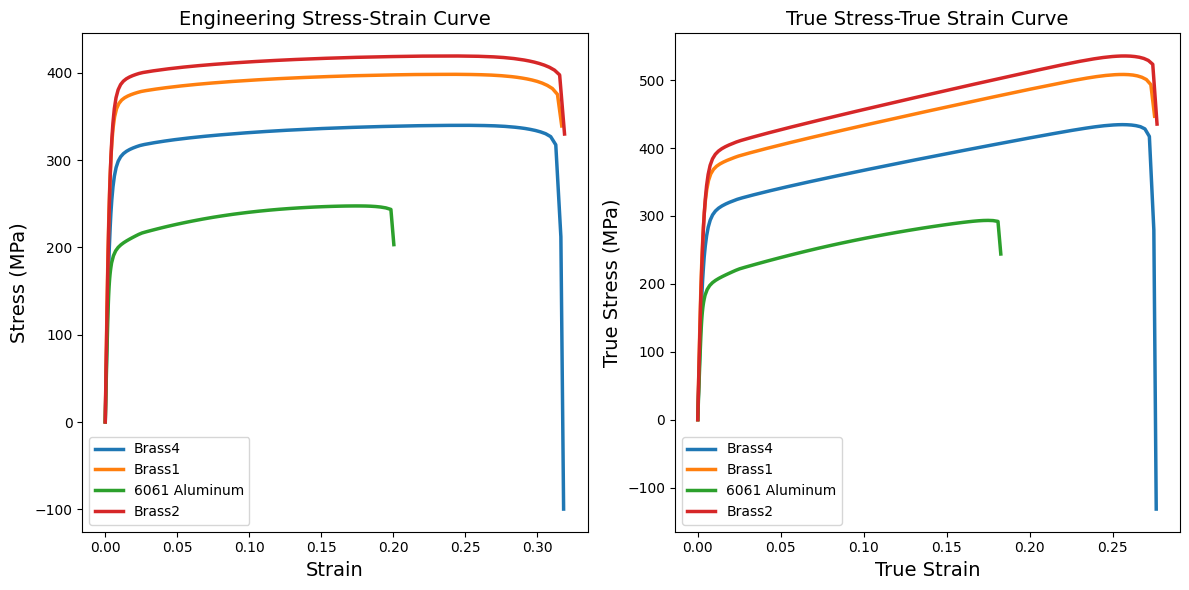

In [5]:
# Select three random materials
random_materials = random.sample(list(result_dic.keys()), 4)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot engineering stress-strain data
ax1.set_title('Engineering Stress-Strain Curve', fontsize=14)
ax1.set_xlabel('Strain', fontsize=14)
ax1.set_ylabel('Stress (MPa)', fontsize=14)

for material in random_materials:
    eng_data = result_dic[material]['eng_data'].sort_values(by='Strain')
    ax1.plot(eng_data['Strain'], eng_data['Stress'], label=material, linewidth = 2.5)
    ax1.legend()

# Plot true stress-true strain data
ax2.set_title('True Stress-True Strain Curve', fontsize=14)
ax2.set_xlabel('True Strain', fontsize=14)
ax2.set_ylabel('True Stress (MPa)', fontsize=14)
for material in random_materials:
    true_data = result_dic[material]['true_data'].sort_values(by='True Strain')
    ax2.plot(true_data['True Strain'], true_data['True Stress'], label=material, linewidth = 2.5)
    ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Compare Test Results 

In [6]:
# Create an empty list to store DataFrames
dfs = []

# Iterate over the metals and add their results to the list
for metal in random_materials:
    metal_results = result_dic.get(metal, {})
    metal_df = pd.DataFrame({'Material': [metal],
                             'Length': [metal_results.get('length', None)],
                             'Width': [metal_results.get('width', None)],
                             'Thickness': [metal_results.get('thickness', None)],
                             'Units': [metal_results.get('units', None)],
                             'Youngs Modulus': [metal_results.get('youngs_modulus', None)],
                             'Yield Strength': [metal_results.get('yield_strength', None)],
                             'Proportional Limit': [metal_results.get('proportional_limit', None)],
                             'Modulus of Resilience': [metal_results.get('modulus_resilience', None)],
                             'Strain Energy Density': [metal_results.get('strain_energy_density', None)],
                             'Modulus of Toughness': [metal_results.get('modulus_toughness', None)],
                             'Ultimate Tensile Strength': [metal_results.get('ultimate_tensile_strength', None)],
                             'Engineering Strain': [metal_results.get('engineering_strain', None)],
                             'Engineering Stress': [metal_results.get('engineering_stress', None)]})
    dfs.append(metal_df)

# Concatenate the DataFrames in the list
results_df = pd.concat(dfs, ignore_index=True)


In [10]:
# Display the DataFrame
display(results_df)

,Material,Length,Width,Thickness,Units,Youngs Modulus,Yield Strength,Proportional Limit,Modulus of Resilience,Strain Energy Density,Modulus of Toughness,Ultimate Tensile Strength,Engineering Strain,Engineering Stress
0,6061 Aluminum2,50,13.53,3.12,MPa,66046.597863,242.538,203.807407,0.314,0.445,58.035,106,0.1851,0.1851
1,1018 Steel6,50,13.48,3.14,MPa,146999.456950,294.611,239.710965,0.195,0.295,98.623,117,0.2837,0.2837
2,6061 Aluminum4,50,12.64,3.14,MPa,58625.813163,199.250,174.310792,0.259,0.339,45.560,103,0.1725,0.1725
3,1018 Steel9,50,13.49,3.14,MPa,133112.144537,324.400,274.960021,0.284,0.395,105.191,120,0.2782,0.2782
